In [1]:
%run sharedMethods.ipynb

In [2]:

config = Config({'expiration': '31MAR23',
          'strikes': [ 20000, 22000, 30000 ]
         })

In [3]:
display(Markdown(f'## Price changes for **{config.expiration}**'))

## Price changes for **31MAR23**

In [4]:
display(Markdown(f'### Strikes **{config.strikes}**'))

### Strikes **[20000, 22000, 30000]**

In [5]:
merged_df = getMergedDataframe(config)

# Unfortunately that leads to a wrong line chart
#merged_df = merged_df.interpolate(method='linear') # or cubic

merged_df = merged_df.dropna()
merged_df


'option_data/BTC-31MAR23-20000-C.json exist already.'

timestamp   btc_usd  option_20000_usd  option_22000_usd   
0    2023-03-30  28039.00        7991.11500        7991.11500  \
1    2023-03-29  28353.00        8435.01750        8435.01750   
3    2023-03-24  27493.00        7835.50500        7835.50500   
4    2023-03-23  28343.00        8361.18500        8361.18500   
6    2023-03-19  28054.00        8149.68700        8149.68700   
..          ...       ...               ...               ...   
303  2022-08-20  21146.00        5381.65700        5381.65700   
314  2022-07-26  21259.78        5686.99115        5686.99115   
317  2022-07-18  22435.04        6528.59664        6528.59664   
320  2022-07-15  20835.39        5417.20140        5417.20140   
347  2022-06-15  22555.27        6653.80465        6653.80465   

     option_30000_usd  
0         6098.482500  
1         6294.366000  
3         5910.995000  
4         5881.172500  
6         5751.070000  
..                ...  
303       4451.233000  
314       4889.749400  
317       5384.409600  
320       4677.545055  
347       5751.593850  

[150 rows x 5 columns]

### Show the Plain prices of BTC and the Options

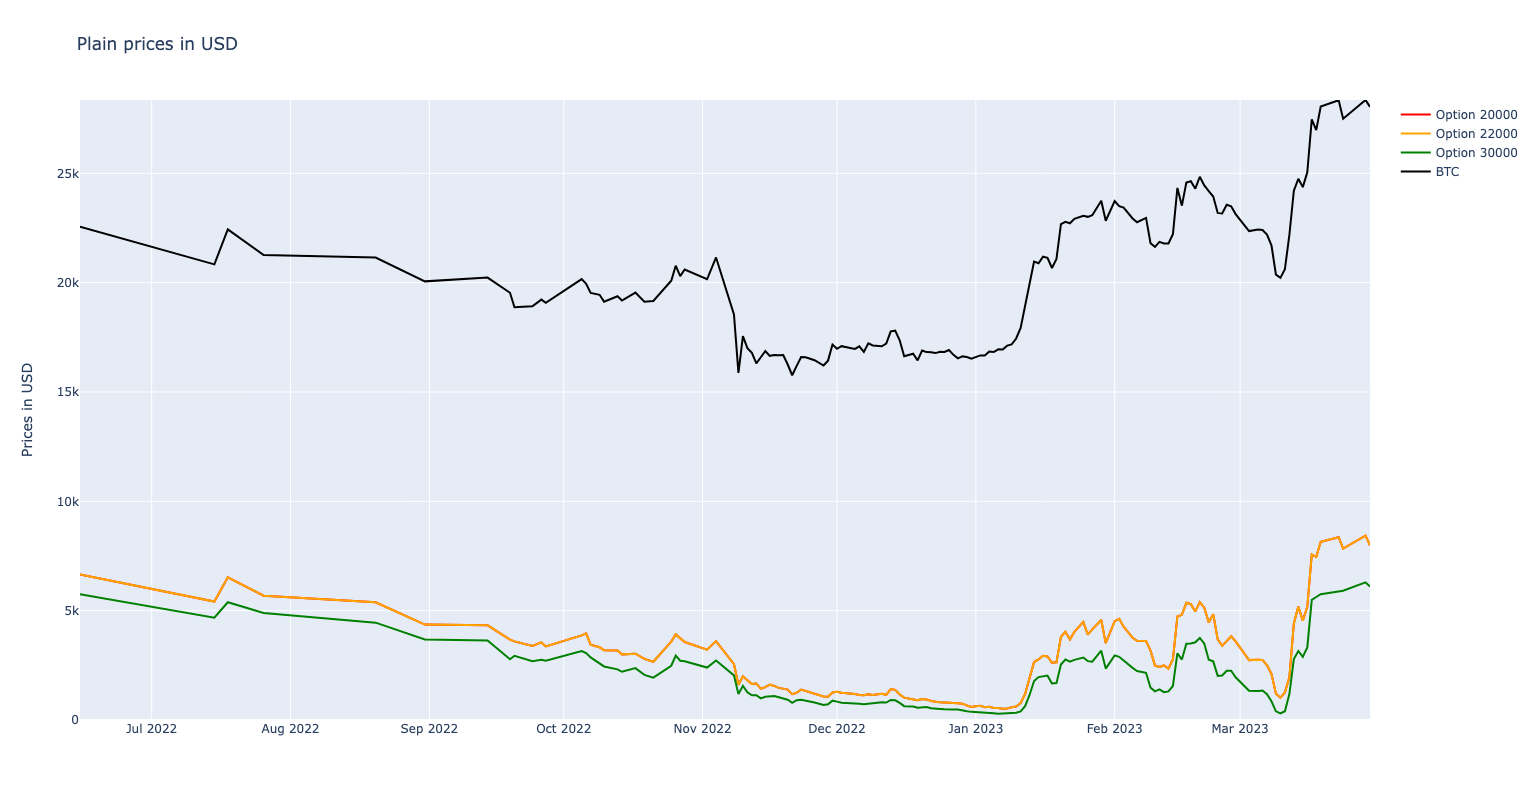

In [6]:

showPlainPriceChart(merged_df, config.strikes)

In [7]:
getTradingViewWidget("Bitstamp:BTCUSD")


### Move the lines up to the same startpoint of BTC to roughly visualize the delta

In [8]:

shiftLinesToTheStartOfBTC(merged_df, config.strikes)
merged_df

timestamp   btc_usd  option_20000_usd  option_22000_usd   
0    2023-03-30  28039.00        7991.11500        7991.11500  \
1    2023-03-29  28353.00        8435.01750        8435.01750   
3    2023-03-24  27493.00        7835.50500        7835.50500   
4    2023-03-23  28343.00        8361.18500        8361.18500   
6    2023-03-19  28054.00        8149.68700        8149.68700   
..          ...       ...               ...               ...   
303  2022-08-20  21146.00        5381.65700        5381.65700   
314  2022-07-26  21259.78        5686.99115        5686.99115   
317  2022-07-18  22435.04        6528.59664        6528.59664   
320  2022-07-15  20835.39        5417.20140        5417.20140   
347  2022-06-15  22555.27        6653.80465        6653.80465   

     option_30000_usd  option_20000_offsetted_usd  option_22000_offsetted_usd   
0         6098.482500                 23892.58035                 23892.58035  \
1         6294.366000                 24336.48285                 24336.48285   
3         5910.995000                 23736.97035                 23736.97035   
4         5881.172500                 24262.65035                 24262.65035   
6         5751.070000                 24051.15235                 24051.15235   
..                ...                         ...                         ...   
303       4451.233000                 21283.12235                 21283.12235   
314       4889.749400                 21588.45650                 21588.45650   
317       5384.409600                 22430.06199                 22430.06199   
320       4677.545055                 21318.66675                 21318.66675   
347       5751.593850                 22555.27000                 22555.27000   

     option_30000_offsetted_usd  
0                  22902.158650  
1                  23098.042150  
3                  22714.671150  
4                  22684.848650  
6                  22554.746150  
..                          ...  
303                21254.909150  
314                21693.425550  
317                22188.085750  
320                21481.221205  
347                22555.270000  

[150 rows x 8 columns]

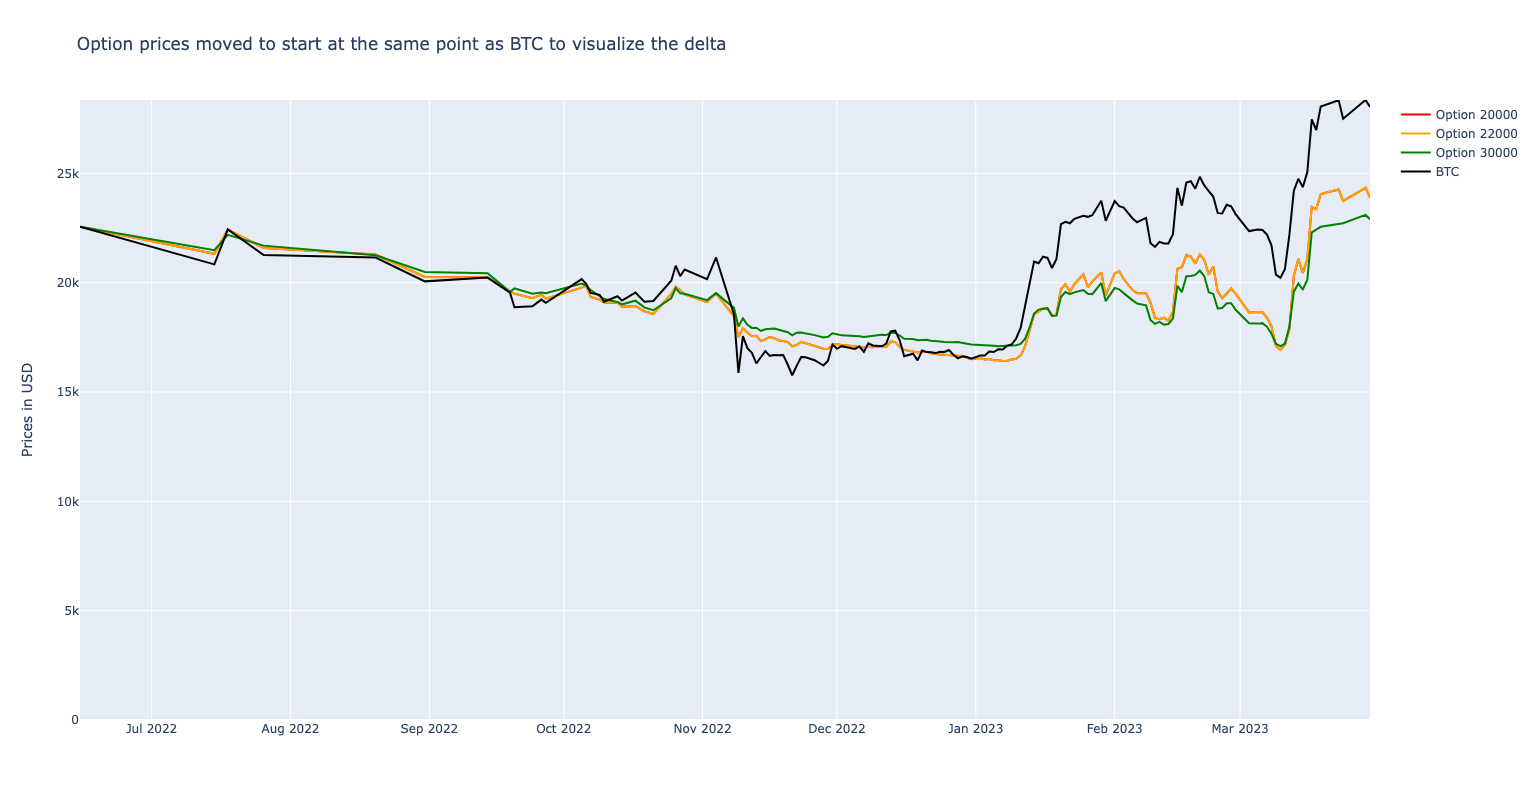

In [9]:
showOffsettedPriceChart(merged_df, config.strikes)

In [10]:
dfPricesChangedUSD = getPriceChanges(merged_df, config.strikes)
dfPricesChangedUSD
        

timestamp   btc_usd  option_20000_changed_usd   
0    2023-03-30  28039.00                -443.90250  \
1    2023-03-29  28353.00                 599.51250   
3    2023-03-24  27493.00                -525.68000   
4    2023-03-23  28343.00                 211.49800   
6    2023-03-19  28054.00                 689.71700   
..          ...       ...                       ...   
303  2022-08-20  21146.00                -305.33415   
314  2022-07-26  21259.78                -841.60549   
317  2022-07-18  22435.04                1111.39524   
320  2022-07-15  20835.39               -1236.60325   
347  2022-06-15  22555.27                       NaN   

     option_20000_changed_percent  option_22000_changed_usd   
0                       -5.554951                -443.90250  \
1                        7.107424                 599.51250   
3                       -6.708949                -525.68000   
4                        2.529522                 211.49800   
6                        8.463110                 689.71700   
..                            ...                       ...   
303                     -5.673609                -305.33415   
314                    -14.798783                -841.60549   
317                     17.023494                1111.39524   
320                    -22.827345               -1236.60325   
347                           NaN                       NaN   

     option_22000_changed_percent  option_30000_changed_usd   
0                       -5.554951               -195.883500  \
1                        7.107424                383.371000   
3                       -6.708949                 29.822500   
4                        2.529522                130.102500   
6                        8.463110                125.740000   
..                            ...                       ...   
303                     -5.673609               -438.516400   
314                    -14.798783               -494.660200   
317                     17.023494                706.864545   
320                    -22.827345              -1074.048795   
347                           NaN                       NaN   

     option_30000_changed_percent  btc_usd_changed_usd   
0                       -3.212004              -314.00  \
1                        6.090701               860.00   
3                        0.504526              -850.00   
4                        2.212186               289.00   
6                        2.186376              1074.00   
..                            ...                  ...   
303                     -9.851571              -113.78   
314                    -10.116269             -1175.26   
317                     13.127986              1599.65   
320                    -22.961805             -1719.88   
347                           NaN                  NaN   

     btc_usd_changed_percent  
0                  -1.119869  
1                   3.033189  
3                  -3.091696  
4                   1.019652  
6                   3.828331  
..                       ...  
303                -0.538069  
314                -5.528091  
317                 7.130141  
320                -8.254609  
347                      NaN  

[150 rows x 10 columns]

### Absolute changes in USD compared to previous day. The Delta.

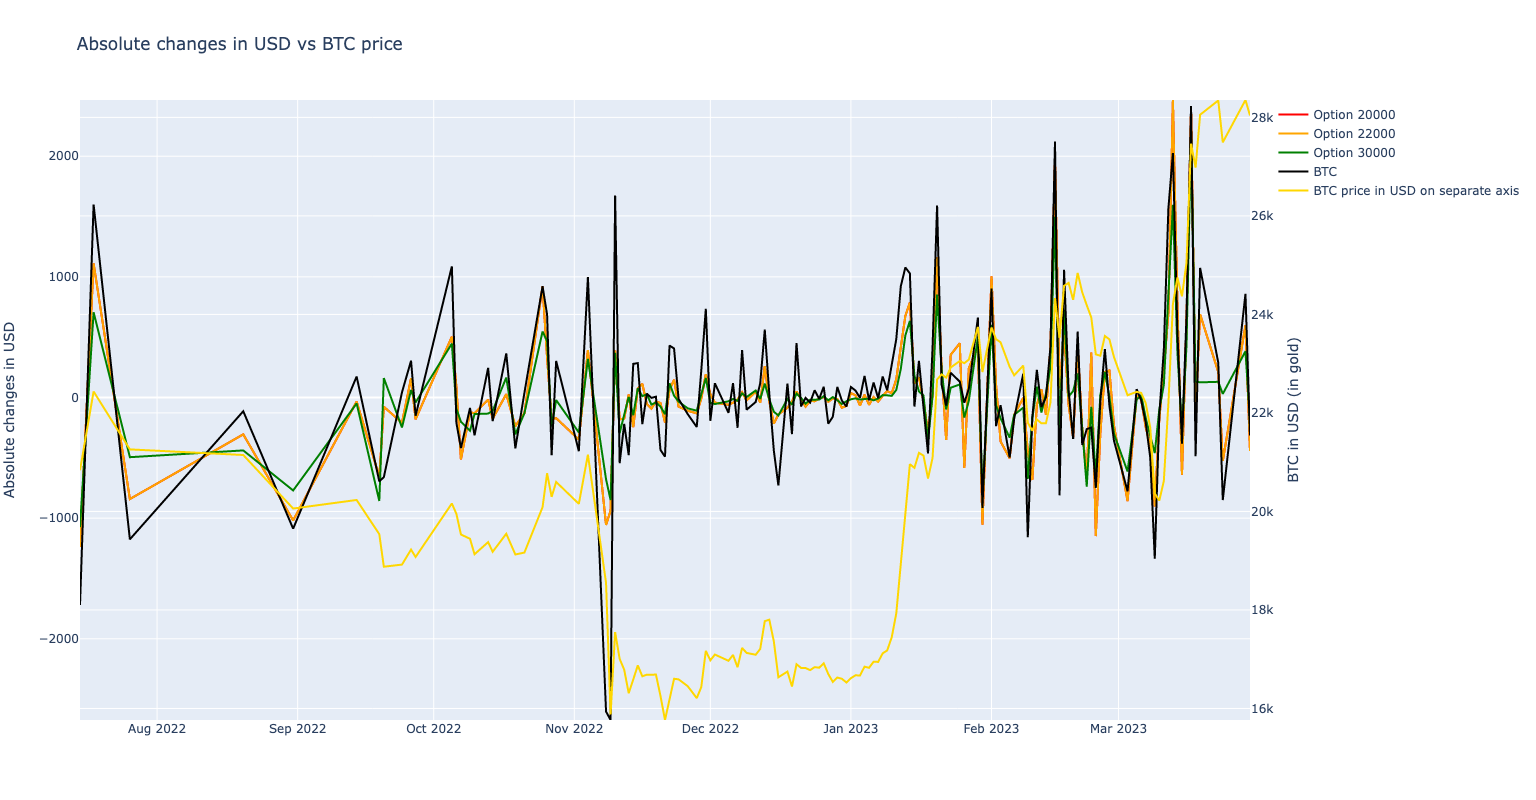

In [11]:
dfPricesChangedUSD = dfPricesChangedUSD.dropna()

plotOptionPricesChangedUSD(dfPricesChangedUSD, config.strikes)


### Percent changes compared to previous data point relative to the BTC price

#### The out of the money options fluctuate more than the options that are more in the money.

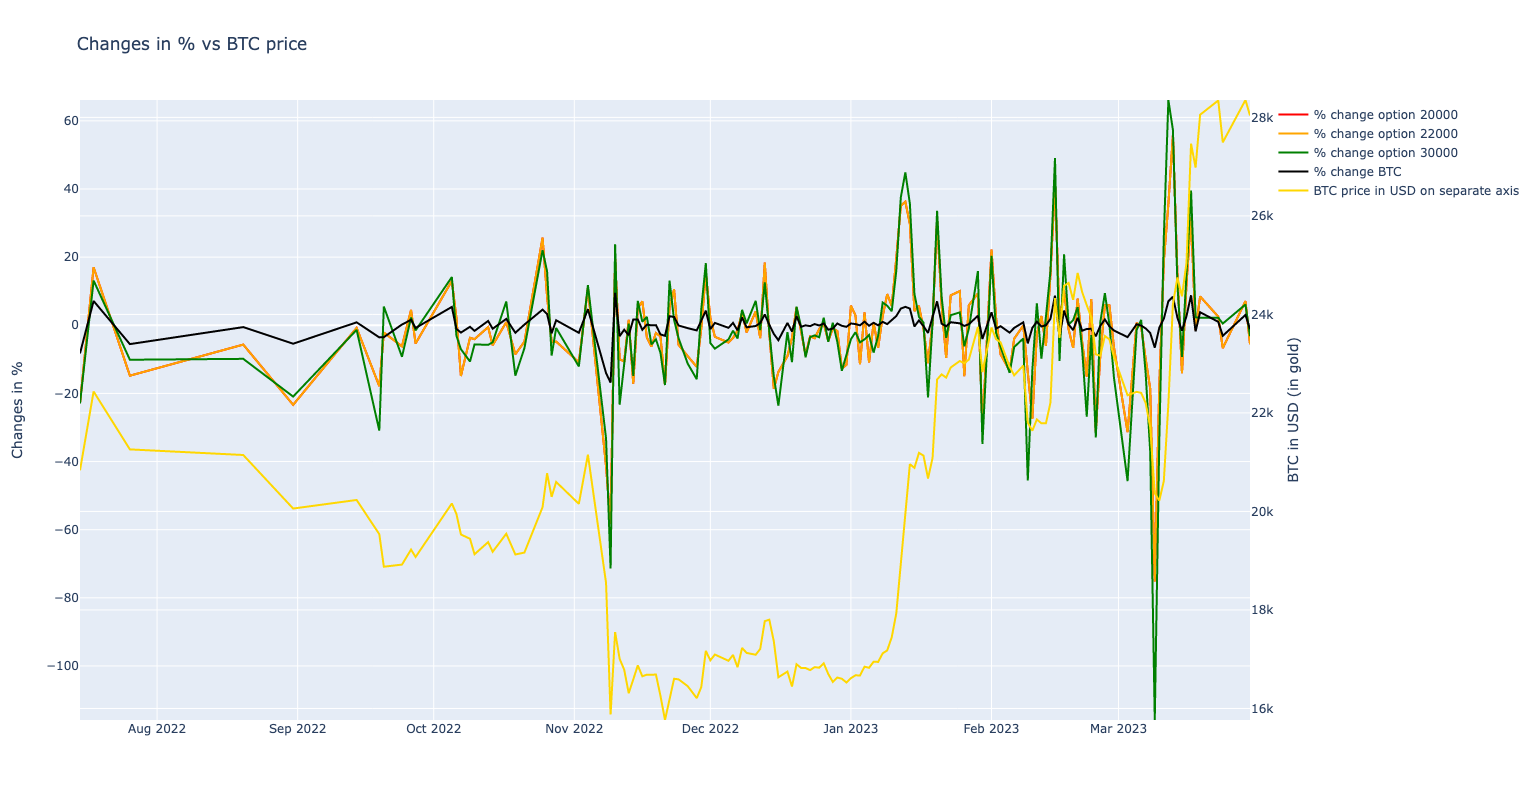

In [12]:
display(Markdown('#### The out of the money options fluctuate more than the options that are more in the money.'))
plotOptionPricesChangedPercent(dfPricesChangedUSD, config.strikes)

## Price increase in %

In [13]:
df_percent_all = calcGains(merged_df, config.strikes)

#with pd.option_context('display.max_rows', None):
#    display(df_percent_all)
df_percent_all

timestamp   btc_usd  btc_percent_all  option_20000_usd   
0    2023-03-30  28039.00        24.312411        7991.11500  \
1    2023-03-29  28353.00        25.704547        8435.01750   
3    2023-03-24  27493.00        21.891691        7835.50500   
4    2023-03-23  28343.00        25.660212        8361.18500   
6    2023-03-19  28054.00        24.378915        8149.68700   
..          ...       ...              ...               ...   
303  2022-08-20  21146.00        -6.248074        5381.65700   
314  2022-07-26  21259.78        -5.743624        5686.99115   
317  2022-07-18  22435.04        -0.533046        6528.59664   
320  2022-07-15  20835.39        -7.625180        5417.20140   
347  2022-06-15  22555.27         0.000000        6653.80465   

     option_20000_percent_all  option_22000_usd  option_22000_percent_all   
0                   20.098431        7991.11500                 20.098431  \
1                   26.769840        8435.01750                 26.769840   
3                   17.759769        7835.50500                 17.759769   
4                   25.660212        8361.18500                 25.660212   
6                   22.481609        8149.68700                 22.481609   
..                        ...               ...                       ...   
303                -19.119101        5381.65700                -19.119101   
314                -14.530236        5686.99115                -14.530236   
317                 -1.881751        6528.59664                 -1.881751   
320                -18.584905        5417.20140                -18.584905   
347                  0.000000        6653.80465                  0.000000   

     option_30000_usd  option_30000_percent_all  
0         6098.482500                  6.031174  
1         6294.366000                  9.436900  
3         5910.995000                  2.771426  
4         5881.172500                  2.252917  
6         5751.070000                 -0.009108  
..                ...                       ...  
303       4451.233000                -22.608704  
314       4889.749400                -14.984446  
317       5384.409600                 -6.384043  
320       4677.545055                -18.673933  
347       5751.593850                  0.000000  

[150 rows x 9 columns]

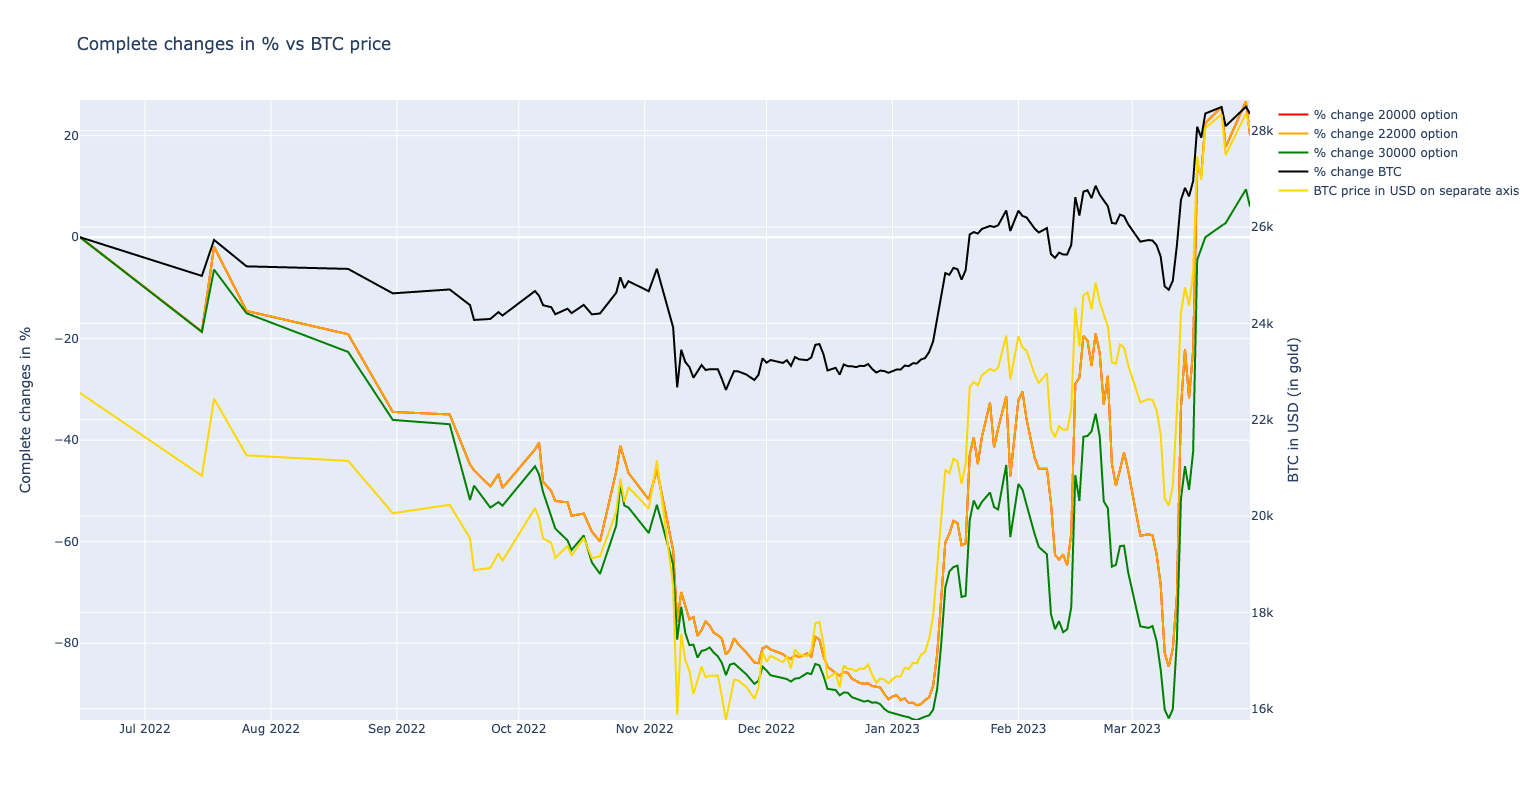

In [14]:
plotOptionPricesChangedPercentAll(df_percent_all, config.strikes)